# Importing Required Libraries

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

# Step 2: Load the dataset
# Access the uploaded file content using the filename from the uploaded dictionary
file_name = list(uploaded.keys())[0] # Get the first filename from the dictionary
df = pd.read_csv(file_name)
print("✅ Dataset loaded successfully!")

# Step 3: Display dataset shape and column names
print(f"Dataset shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")

# Step 4: Preview the first few rows
df.head()

Saving BBC News Train.csv to BBC News Train (5).csv
✅ Dataset loaded successfully!
Dataset shape: (1490, 3)
Column names: ['ArticleId', 'Text', 'Category']


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
# Step 5: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 6: Drop rows with missing values (if any)
df = df.dropna()
print(f"Shape after cleaning: {df.shape}")

# Step 7: Check category distribution
print("\nCategory distribution:")
print(df['Category'].value_counts())

# Step 8: Rename columns for consistency
df = df.rename(columns={
    'ArticleId': 'id',
    'Text': 'content',
    'Category': 'category'
})

# Step 9: Save the cleaned dataset
df.to_csv('newsbot_dataset.csv', index=False)
print("✅ Cleaned dataset saved as 'newsbot_dataset.csv'")


Missing values per column:
ArticleId    0
Text         0
Category     0
dtype: int64
Shape after cleaning: (1490, 3)

Category distribution:
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64
✅ Cleaned dataset saved as 'newsbot_dataset.csv'


# **Text Preprocessing Pipeline**

In [ ]:
# Step 1: Install and import required libraries
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load stopwords from NLTK
stop_words = set(stopwords.words('english'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 2: Text preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and process with spaCy
    doc = nlp(text)

    # Remove stopwords and lemmatize
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct and not token.is_space]

    return " ".join(tokens)
sample = "Stocks surged 30% on unexpected news!)"
preprocessed_sample = preprocess_text(sample)
print(preprocessed_sample)

stock surge unexpected news


In [ ]:
# Step 3: Apply preprocessing to content column
df['clean_content'] = df['content'].apply(preprocess_text)
df[['content', 'clean_content']].head()


,content,clean_content
0,worldcom ex-boss launches defence lawyers defe...,worldcom exboss launch defence lawyer defend f...
1,german business confidence slides german busin...,german business confidence slide german busine...
2,bbc poll indicates economic gloom citizens in ...,bbc poll indicate economic gloom citizen major...
3,lifestyle governs mobile choice faster bett...,lifestyle govern mobile choice fast well funky...
4,enron bosses in $168m payout eighteen former e...,enron boss payout eighteen former enron direct...


In [ ]:
# Step 4: Save the new dataset with cleaned text
df.to_csv('newsbot_cleaned.csv', index=False)
print("✅ Preprocessed dataset saved as 'newsbot_cleaned.csv'")


✅ Preprocessed dataset saved as 'newsbot_cleaned.csv'


# **FASE 3: TF-IDF Feature Extraction (Module 3)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the preprocessed dataset
df = pd.read_csv("newsbot_cleaned.csv")
print("✅ Cleaned dataset loaded.")
df[['clean_content', 'category']].head()


✅ Cleaned dataset loaded.


,clean_content,category
0,worldcom exboss launch defence lawyer defend f...,business
1,german business confidence slide german busine...,business
2,bbc poll indicate economic gloom citizen major...,business
3,lifestyle govern mobile choice fast well funky...,tech
4,enron boss payout eighteen former enron direct...,business


In [ ]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=3000)

# Fit and transform the clean content
X_tfidf = vectorizer.fit_transform(df['clean_content'])

# Convert to DataFrame for visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print("✅ TF-IDF matrix shape:", tfidf_df.shape)

# Add category back to the dataframe
tfidf_df['category'] = df['category']


✅ TF-IDF matrix shape: (1490, 3000)


In [ ]:
# Group by category and calculate mean TF-IDF score
category_tfidf = tfidf_df.groupby('category').mean()

# Show top 10 words for each category
for category in category_tfidf.index:
    print(f"\nTop terms for category: {category}")
    top_terms = category_tfidf.loc[category].sort_values(ascending=False).head(10)
    print(top_terms)



Top terms for category: business
bn         0.060369
say        0.058296
firm       0.041683
company    0.039914
market     0.037435
us         0.037209
bank       0.036696
year       0.036350
growth     0.036160
economy    0.034448
Name: business, dtype: float64

Top terms for category: entertainment
film     0.112640
award    0.055845
star     0.055124
say      0.042410
good     0.040862
show     0.039638
music    0.038746
actor    0.038414
band     0.038322
year     0.033410
Name: entertainment, dtype: float64

Top terms for category: politics
mr            0.092179
say           0.088325
labour        0.070490
election      0.065429
blair         0.060266
party         0.058192
government    0.049919
tory          0.049408
would         0.049074
minister      0.046593
Name: politics, dtype: float64

Top terms for category: sport
game        0.048851
win         0.045671
play        0.042371
england     0.040844
say         0.038893
player      0.035672
match       0.033701
champio

In [ ]:
# Save if needed
tfidf_df.to_csv("newsbot_tfidf_matrix.csv", index=False)
print("✅ TF-IDF matrix saved as 'newsbot_tfidf_matrix.csv'")


✅ TF-IDF matrix saved as 'newsbot_tfidf_matrix.csv'


# **FASE 4: POS Pattern Analysis**

In [ ]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Reload dataset
df = pd.read_csv("newsbot_cleaned.csv")
df[['clean_content', 'category']].head()


,clean_content,category
0,worldcom exboss launch defence lawyer defend f...,business
1,german business confidence slide german busine...,business
2,bbc poll indicate economic gloom citizen major...,business
3,lifestyle govern mobile choice fast well funky...,tech
4,enron boss payout eighteen former enron direct...,business


In [ ]:
# Function to extract POS tags from a text
def extract_pos_tags(text):
    doc = nlp(text)
    return [token.pos_ for token in doc if not token.is_punct and not token.is_space]


In [ ]:
# Apply POS extraction to each article
df['pos_tags'] = df['clean_content'].apply(extract_pos_tags)
df[['clean_content', 'pos_tags']].head()


,clean_content,pos_tags
0,worldcom exboss launch defence lawyer defend f...,"[PROPN, PROPN, PROPN, NOUN, NOUN, VERB, ADJ, P..."
1,german business confidence slide german busine...,"[ADJ, NOUN, NOUN, NOUN, ADJ, NOUN, NOUN, NOUN,..."
2,bbc poll indicate economic gloom citizen major...,"[PROPN, PROPN, VERB, ADJ, NOUN, NOUN, NOUN, NO..."
3,lifestyle govern mobile choice fast well funky...,"[PROPN, NOUN, ADJ, NOUN, ADV, INTJ, ADJ, NOUN,..."
4,enron boss payout eighteen former enron direct...,"[PROPN, NOUN, NOUN, NUM, ADJ, NOUN, NOUN, VERB..."


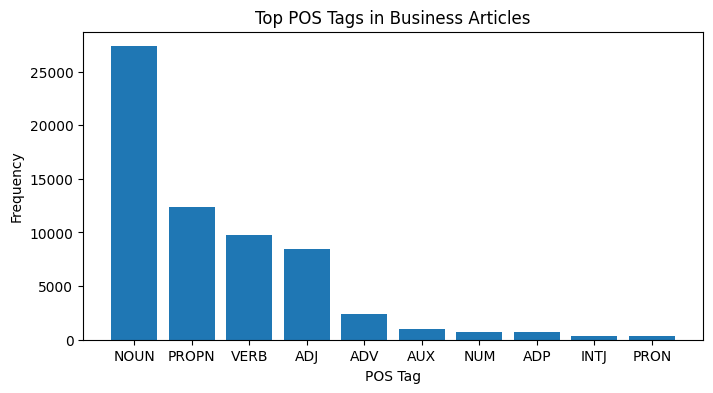

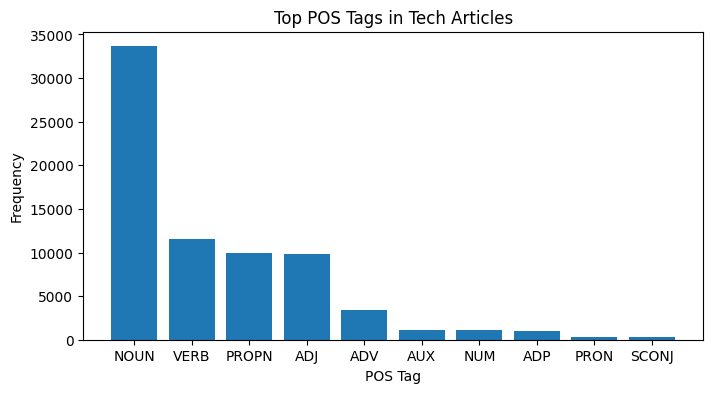

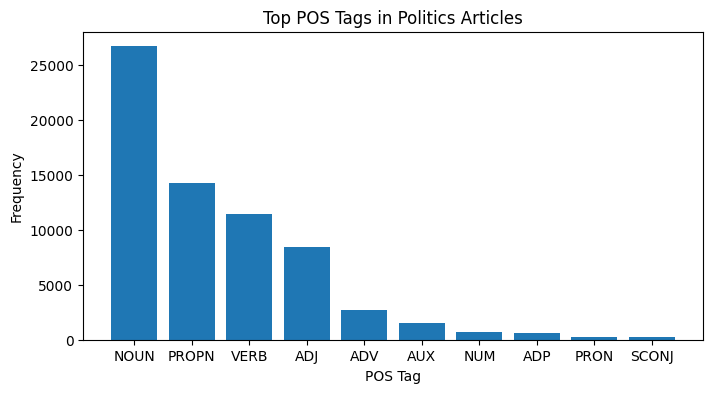

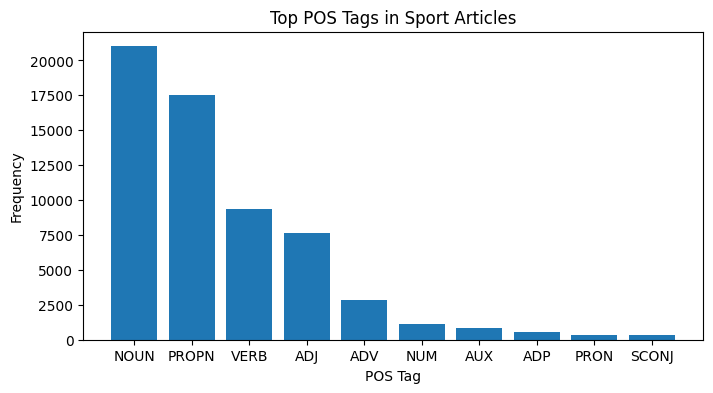

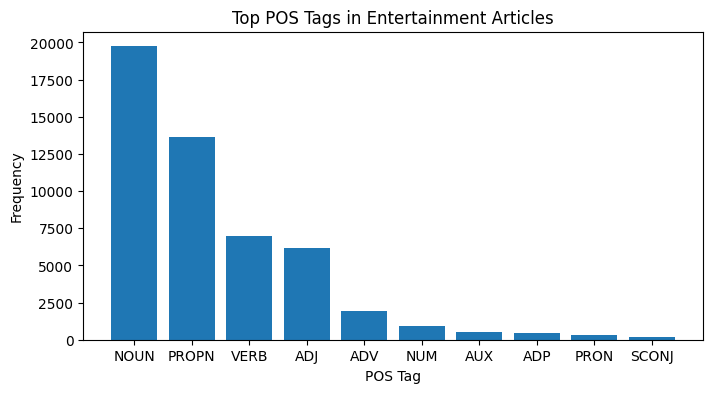

In [ ]:
# Flatten POS tags by category
category_pos = {}

for category in df['category'].unique():
    all_tags = []
    for tags in df[df['category'] == category]['pos_tags']:
        all_tags.extend(tags)
    category_pos[category] = Counter(all_tags)

# Plot POS distribution for each category
for category, pos_counter in category_pos.items():
    top_tags = dict(pos_counter.most_common(10))
    plt.figure(figsize=(8,4))
    plt.bar(top_tags.keys(), top_tags.values())
    plt.title(f"Top POS Tags in {category.capitalize()} Articles")
    plt.xlabel("POS Tag")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# 1. Split your dataset
X = df['content']  # Change if your text column has a different name
y = df['category']  # Change if your labels column has another name

# 2. Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 4. Train the model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 5. Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97        75
entertainment       1.00      1.00      1.00        46
     politics       0.93      0.95      0.94        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.95      0.96        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



#PHASE 5: Modeling and Testing the NewsBot

In [ ]:
def predict_category(news_text):
    news_tfidf = vectorizer.transform([news_text])
    prediction = clf.predict(news_tfidf)
    return prediction[0]

# Example:
predict_category("The government just released a new AI policy.")


np.str_('politics')

In [1]:
def newsbot():
    print("🧠 Welcome to NewsBot – Your AI News Classifier 🗞️")
    while True:
        user_input = input("Enter a news article (or type 'exit' to quit): ")
        if user_input.lower() == 'exit':
            break
        category = predict_category(user_input)
        print(f"Predicted Category: {category}\n")
newsbot()

🧠 Welcome to NewsBot – Your AI News Classifier 🗞️


KeyboardInterrupt: Interrupted by user